# Next Word Prediction - NLP - RNN/LSTM

### Importing Libraries

In [36]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Embedding, LSTM
from keras.layers import LSTM, Dropout
from keras.layers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os


### Importing Data

In [37]:
path = 'gutenberg.txt'

file = open(path,"r",encoding='utf-8')
lines = []

for i in file:
    lines.append(i)
    
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  One morning, when Gregor Samsa woke from troubled dreams, he found

The Last Line:  first to get up and stretch out her young body.


### Cleaning Data

In [38]:
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.'

In [39]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he'

In [40]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room altho'

### Keras Tokenization

In [41]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

In [42]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2617


In [43]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)    #Convert to Numpy Matrix
sequences[:10]

The Length of sequences are:  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

In [44]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [45]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 17  53 293   2  18]
The responses are:  [ 53 293   2  18 729]


In [46]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating Model

In [47]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation='relu'))

model.add(Dense(vocab_size, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

# return model

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             26170     
                                                                 
 lstm (LSTM)                 (None, 1, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 2617)              2619617   
                                                                 
Total params: 15,694,787
Trainable params: 15,694,787
Non-trainable params: 0
_________________________________________________________________


### Plot The Model:

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

### Compile the Model

In [54]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [55]:
history = model.fit(X, y, epochs=150,validation_split=0.05, batch_size=64,shuffle=True, callbacks=[checkpoint, reduce, tensorboard_Visualization]).history

Epoch 1/150
58/58 [==============================] - ETA: 0s - loss: 4.2823 - accuracy: 0.0774
Epoch 1: loss did not improve from 4.00048
58/58 [==============================] - 24s 232ms/step - loss: 4.2823 - accuracy: 0.0774 - val_loss: 4.8981 - val_accuracy: 0.0462 - lr: 0.0010
Epoch 2/150
58/58 [==============================] - ETA: 0s - loss: 3.5853 - accuracy: 0.1345
Epoch 2: loss improved from 4.00048 to 3.58534, saving model to nextword1.h5
58/58 [==============================] - 12s 211ms/step - loss: 3.5853 - accuracy: 0.1345 - val_loss: 6.0190 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 3/150
58/58 [==============================] - ETA: 0s - loss: 3.3678 - accuracy: 0.1416
Epoch 3: loss improved from 3.58534 to 3.36784, saving model to nextword1.h5
58/58 [==============================] - 12s 203ms/step - loss: 3.3678 - accuracy: 0.1416 - val_loss: 6.6100 - val_accuracy: 0.0513 - lr: 0.0010
Epoch 4/150
58/58 [==============================] - ETA: 0s - loss: 3.2843 - accur

Epoch 27/150
58/58 [==============================] - ETA: 0s - loss: 2.0141 - accuracy: 0.3457
Epoch 27: loss improved from 2.02964 to 2.01413, saving model to nextword1.h5
58/58 [==============================] - 8s 144ms/step - loss: 2.0141 - accuracy: 0.3457 - val_loss: 11.8898 - val_accuracy: 0.0154 - lr: 0.0010
Epoch 28/150
58/58 [==============================] - ETA: 0s - loss: 1.9744 - accuracy: 0.3565
Epoch 28: loss improved from 2.01413 to 1.97444, saving model to nextword1.h5
58/58 [==============================] - 10s 166ms/step - loss: 1.9744 - accuracy: 0.3565 - val_loss: 12.2929 - val_accuracy: 0.0256 - lr: 0.0010
Epoch 29/150
58/58 [==============================] - ETA: 0s - loss: 1.9676 - accuracy: 0.3584
Epoch 29: loss improved from 1.97444 to 1.96757, saving model to nextword1.h5
58/58 [==============================] - 8s 144ms/step - loss: 1.9676 - accuracy: 0.3584 - val_loss: 12.1808 - val_accuracy: 0.0154 - lr: 0.0010
Epoch 30/150
58/58 [======================

58/58 [==============================] - ETA: 0s - loss: 1.5442 - accuracy: 0.4450
Epoch 53: loss did not improve from 1.54389

Epoch 53: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
58/58 [==============================] - 7s 128ms/step - loss: 1.5442 - accuracy: 0.4450 - val_loss: 15.2553 - val_accuracy: 0.0103 - lr: 0.0010
Epoch 54/150
58/58 [==============================] - ETA: 0s - loss: 1.1490 - accuracy: 0.5604
Epoch 54: loss improved from 1.54389 to 1.14900, saving model to nextword1.h5
58/58 [==============================] - 10s 170ms/step - loss: 1.1490 - accuracy: 0.5604 - val_loss: 15.5441 - val_accuracy: 0.0103 - lr: 2.0000e-04
Epoch 55/150
58/58 [==============================] - ETA: 0s - loss: 0.9962 - accuracy: 0.6021
Epoch 55: loss improved from 1.14900 to 0.99622, saving model to nextword1.h5
58/58 [==============================] - 9s 159ms/step - loss: 0.9962 - accuracy: 0.6021 - val_loss: 15.7721 - val_accuracy: 0.0103 - lr: 2.0000e-04
Ep

58/58 [==============================] - ETA: 0s - loss: 0.7903 - accuracy: 0.5891
Epoch 78: loss improved from 0.79620 to 0.79029, saving model to nextword1.h5
58/58 [==============================] - 12s 206ms/step - loss: 0.7903 - accuracy: 0.5891 - val_loss: 20.6545 - val_accuracy: 0.0103 - lr: 2.0000e-04
Epoch 79/150
58/58 [==============================] - ETA: 0s - loss: 0.7955 - accuracy: 0.5899
Epoch 79: loss did not improve from 0.79029
58/58 [==============================] - 8s 134ms/step - loss: 0.7955 - accuracy: 0.5899 - val_loss: 20.6878 - val_accuracy: 0.0103 - lr: 2.0000e-04
Epoch 80/150
58/58 [==============================] - ETA: 0s - loss: 0.7867 - accuracy: 0.5823
Epoch 80: loss improved from 0.79029 to 0.78673, saving model to nextword1.h5
58/58 [==============================] - 10s 170ms/step - loss: 0.7867 - accuracy: 0.5823 - val_loss: 20.8044 - val_accuracy: 0.0103 - lr: 2.0000e-04
Epoch 81/150
58/58 [==============================] - ETA: 0s - loss: 0.7886

Epoch 104/150
58/58 [==============================] - ETA: 0s - loss: 0.7508 - accuracy: 0.5831
Epoch 104: loss improved from 0.75184 to 0.75076, saving model to nextword1.h5
58/58 [==============================] - 10s 170ms/step - loss: 0.7508 - accuracy: 0.5831 - val_loss: 22.9908 - val_accuracy: 0.0051 - lr: 2.0000e-04
Epoch 105/150
58/58 [==============================] - ETA: 0s - loss: 0.7525 - accuracy: 0.5826
Epoch 105: loss did not improve from 0.75076
58/58 [==============================] - 8s 146ms/step - loss: 0.7525 - accuracy: 0.5826 - val_loss: 22.9774 - val_accuracy: 0.0051 - lr: 2.0000e-04
Epoch 106/150
58/58 [==============================] - ETA: 0s - loss: 0.7486 - accuracy: 0.5877
Epoch 106: loss improved from 0.75076 to 0.74861, saving model to nextword1.h5
58/58 [==============================] - 8s 141ms/step - loss: 0.7486 - accuracy: 0.5877 - val_loss: 23.0055 - val_accuracy: 0.0051 - lr: 2.0000e-04
Epoch 107/150
58/58 [==============================] - ETA

58/58 [==============================] - 8s 146ms/step - loss: 0.7288 - accuracy: 0.5872 - val_loss: 24.0481 - val_accuracy: 0.0051 - lr: 2.0000e-04
Epoch 131/150
58/58 [==============================] - ETA: 0s - loss: 0.7268 - accuracy: 0.5858
Epoch 131: loss improved from 0.72882 to 0.72678, saving model to nextword1.h5
58/58 [==============================] - 10s 166ms/step - loss: 0.7268 - accuracy: 0.5858 - val_loss: 24.2237 - val_accuracy: 0.0051 - lr: 2.0000e-04
Epoch 132/150
58/58 [==============================] - ETA: 0s - loss: 0.7299 - accuracy: 0.5809
Epoch 132: loss did not improve from 0.72678
58/58 [==============================] - 8s 135ms/step - loss: 0.7299 - accuracy: 0.5809 - val_loss: 24.0743 - val_accuracy: 0.0051 - lr: 2.0000e-04
Epoch 133/150
58/58 [==============================] - ETA: 0s - loss: 0.7246 - accuracy: 0.5831
Epoch 133: loss improved from 0.72678 to 0.72457, saving model to nextword1.h5
58/58 [==============================] - 9s 153ms/step - l

In [56]:
pickle.dump(history, open("history.p", "wb"))

In [57]:
model = load_model('nextword1.h5')
history = pickle.load(open("history.p", "rb"))

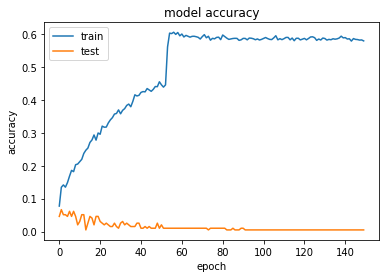

In [58]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

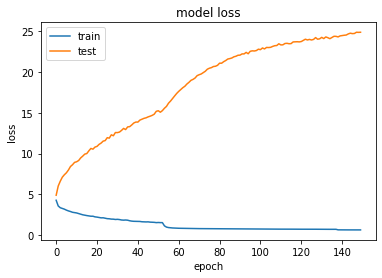

In [59]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');